In [1]:
import numpy as np
import pandas as pd
from Random_Forest.Random_Forest import Random_Forest
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 0 - Extremely Weak
# 1 - Weak
# 2 - Normal
# 3 - Overweight
# 4 - Obesity
# 5 - Extreme Obesity
dataset = pd.read_csv("bmi.csv")
dataset[:10]

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [3]:
X = dataset.iloc[:,:3]
Y = dataset.iloc[:,3].values
Y[:10]

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4], dtype=int64)

In [4]:
X = X.to_numpy()
X[:,0] = X[:,0] == "Male"
X = X.astype(np.float32)

Y_data = ["Extremely Weak", "Weak", "Normal", "Overweight", "Obesity", "Extreme Obesity"]
Y_data, Y[:5], X[:5]

(['Extremely Weak',
  'Weak',
  'Normal',
  'Overweight',
  'Obesity',
  'Extreme Obesity'],
 array([4, 2, 4, 3, 3], dtype=int64),
 array([[  1., 174.,  96.],
        [  1., 189.,  87.],
        [  0., 185., 110.],
        [  0., 195., 104.],
        [  1., 149.,  61.]], dtype=float32))

<BarContainer object of 6 artists>

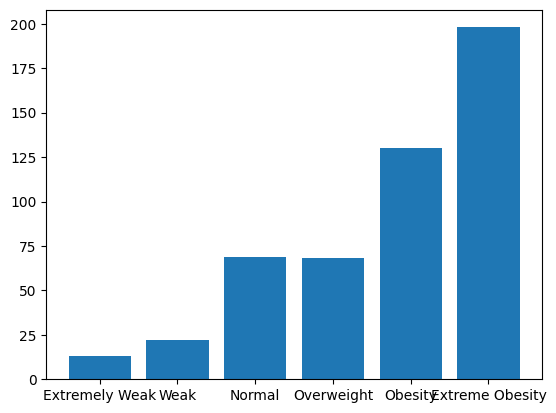

In [5]:
plt.bar(Y_data, np.bincount(Y))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.1, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(450, 3) (450,) (50, 3) (50,)


In [7]:
model = Random_Forest(7, 20)
model.fit(x_train, y_train)

221 229
61 160
37 24
5 32
2 3
16 16
10 6
1 9
9 15
6 9
4 2
88 72
36 52
9 27
21 6
18 3
1 2
2 4
2 2
32 20
15 17
8 9
1 19
26 46
19 7
2 5
3 2
36 10
35 1
26 9
1 8
3 7
100 129
56 73
21 35
14 7
4 10
3 1
33 2
50 23
18 5
3 15
9 6
6 3
5 1
236 214
68 168
32 36
5 27
3 2
1 2
14 13
7 7
2 5
8 5
2 6
19 17
52 116
16 36
8 8
4 4
3 1
16 20
5 11
4 1
10 10
9 1
68 48
35 33
16 19
8 8
5 3
3 5
4 1
1 18
10 8
1 7
22 11
2 20
5 6
25 23
7 18
13 5
1 4
117 97
12 105
8 4
92 13
1 12
61 36
2 59
41 18
9 32
8 1
5 13
2 3
2 1
24 12
5 7
4 3
2 1
203 247
77 126
48 29
14 34
5 9
4 1
1 8
23 11
19 4
10 9
2 7
2 2
4 7
15 14
34 92
18 16
5 13
1 4
5 8
2 3
1 2
40 52
28 12
18 10
6 12
6 6
3 3
4 6
3 1
5 1
15 37
25 12
3 9
8 1
121 126
102 19
2 17
73 53
15 58
7 8
23 35
18 5
7 11
2 5
49 4
23 26
16 10
14 2
5 9
3 2
1 2
119 331
64 55
30 34
2 28
24 4
14 10
3 7
1 2
1 3
20 14
3 17
1 13
28 27
16 12
4 12
1 3
3 9
2 1
13 14
4 9
3 6
3 3
218 113
121 97
72 49
24 48
7 17
14 3
1 2
37 12
5 32
2 3
2 1
25 7
1 6
5 7
55 58
21 34
10 11
32 2
1 31
30 28
13 15
9 4
5 4


In [8]:
y_pre = model.predict(x_test)
print(sum(y_pre == y_test)/len(y_test))

y_pre = model.predict(x_train)
print(sum(y_pre == y_train)/len(y_train))

0.96
0.9822222222222222


In [9]:
import pickle
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("classes.pkl", "wb") as f:
    pickle.dump(Y_data, f)

In [10]:
import pickle
# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
with open("classes.pkl", "rb") as f:
    Y_data = pickle.load(f)

index = 1
Y_data[model.predict([X[index]])[0]], X[index], Y_data[Y[index]]

('Normal', array([  1., 189.,  87.], dtype=float32), 'Normal')

In [12]:
x_test=[1.,189.,87.]
print(y_test)

[4 2 4 4 4 5 5 5 4 5 4 5 2 5 5 3 5 5 3 5 2 5 1 4 4 5 5 5 5 2 4 5 4 4 4 2 5
 2 4 2 5 2 4 3 5 4 4 4 4 4]
